Park Data Set

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt


So in this cell below, we read the parks csv, then filter it so it only shows up parks (in the data set it also had other things that weren't parks). Then we group the neighborhood by the amount of times it shows up, so it pretty much shows how many parks are there.

In [3]:
#read parks
parks = pd.read_csv("Parks.csv")

#filter so it is only "parks", data marked street poles as parks
park_mask = parks["type"] != "Traffic Island/Median"
actual_parks = parks[park_mask]
#print(actual_parks)

#actual_parks.info()
#groups by the neighborhood's amount said
actual_parks = actual_parks.groupby("neighborhood").count()


#makes a neighborhood column since I grouped it by neighborhood, it used it as the index
actual_parks["neighborhood_column"] = actual_parks.index

print(actual_parks.head(71))

                     _id  id  name  type  maintenance_responsibility  image  \
neighborhood                                                                  
Allegheny Center       2   2     2     2                           2      0   
Allentown              2   2     2     2                           2      0   
Arlington              1   1     1     1                           1      0   
Banksville             2   2     2     2                           2      0   
Bedford Dwellings      1   1     1     1                           1      0   
...                  ...  ..   ...   ...                         ...    ...   
Upper Hill             1   1     1     1                           1      1   
Upper Lawrenceville    3   3     3     3                           3      2   
West End               2   2     2     2                           2      0   
West Oakland           1   1     1     1                           1      0   
Westwood               2   2     2     2            

Now we will filter it so we only get the neighborhoods and id

In [4]:
park_2 = actual_parks[["neighborhood_column","_id"]] #gets neighborhood and id
park_2 = park_2.sort_values(by = "_id",ascending=False)
print(park_2.head(60))
#id 7 - get 3, id 6 - get 2, id 5 - get 1

                                 neighborhood_column  _id
neighborhood                                             
Beechview                                  Beechview    7
South Side Slopes                  South Side Slopes    7
Mount Washington                    Mount Washington    6
Hazelwood                                  Hazelwood    6
South Side Flats                    South Side Flats    6
Sheraden                                    Sheraden    6
Troy Hill                                  Troy Hill    5
Central Business District  Central Business District    5
East Liberty                            East Liberty    4
Squirrel Hill South              Squirrel Hill South    4
Marshall-Shadeland                Marshall-Shadeland    4
Elliott                                      Elliott    4
Brighton Heights                    Brighton Heights    4
South Oakland                          South Oakland    3
Spring Hill-City View          Spring Hill-City View    3
Garfield      

Now we're pulling in the Pittsburgh neighborhood map


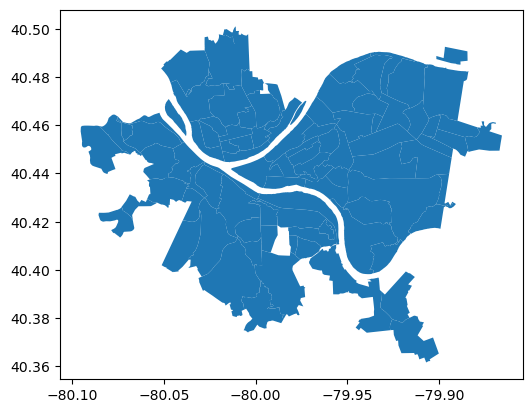

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()
plt.show()

Using the map above, we'll merge the parks into the map

In [6]:
#merges neighborhood with park and makes park_map
park_map = neighborhoods.merge(park_2, left_on='hood', right_on = "neighborhood_column")
park_map[["hood", "_id" ,"geometry"]]

,hood,_id,geometry
0,Central Oakland,2,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,West Oakland,1,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
2,Crawford-Roberts,3,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
3,Strip District,2,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
4,Central Business District,5,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
...,...,...,...
67,Middle Hill,1,"MULTIPOLYGON (((-79.97980 40.44761, -79.97979 ..."
68,Esplen,1,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
69,Fairywood,1,"POLYGON ((-80.08804 40.45975, -80.08803 40.459..."
70,West End,2,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."


Now we map it out

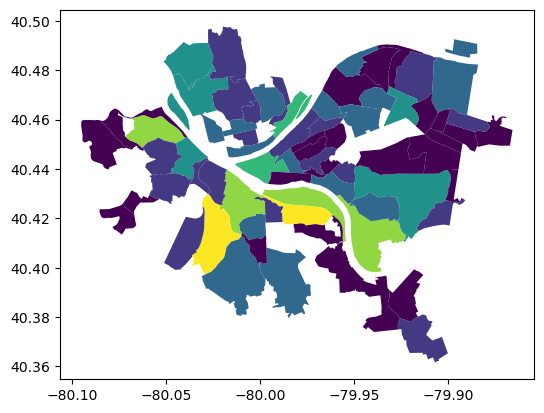

In [7]:
park_map.plot(column = "_id")
plt.show()

Customize it

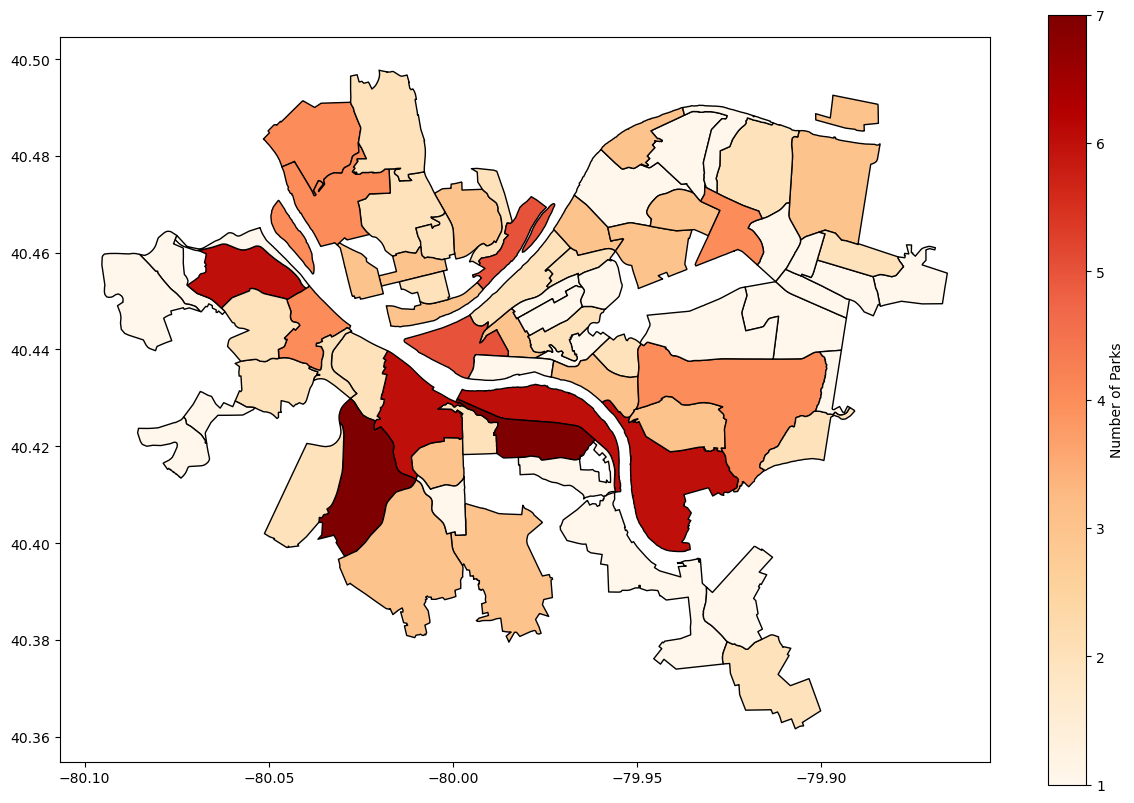

In [8]:
park_map.plot(column = "_id",
              cmap='OrRd',              # choose a color palette
              edgecolor="black",        # outline the districts in white
              legend=True,              # show the legend
              legend_kwds={'label': "Number of Parks"}, # label the legend
              figsize=(15, 10),         # set the size
              missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )
plt.show()